<font color='red'>**Pre step**</font>

If you don't have Anaconda you must install it! This is a Jupyter notebook.
Jupyter is one of the programs that come in Anaconda.
Also, Jupyter runs locally, so you need all the files in the folder "Follow up" in a local directory. When you save images or read files it will be where this file is located. For example:

C:\Users\unsd.intern5.UNHQ\Documents\First_rep\Follow-up\Follow-up clean

<font color='teal'>**Some tips**
* If something doesn't run, check the line where the indication of the error is and run that separately. This will help identify the problem easier.
* StackOverflow and similar pages with questions from people are your friends! Try to define your doubt as specifically as possible and type that in Google. You can write something like *split string by pattern in python* or *make a list of lists into a list of elements* or stuff like this. It is very helpful!
* Never blame Python, it is always a mistake you did. At least 99.99% of the time.
* If desperate, ask Luis Gonzalez or Hernan Hernandez!</font>


### Updating the json file with the information of the decisions

In this file we will add to the json file the new decisions of the past session

* you will need the latest document with the decisions in the json format
* you will ad the information of the new session
* the topic attribute or key will be blank because this part is manual
* it will produce a csv to read in excel and classify

**To run a chunk or cell of code, make sure you are in it (you can type or click) and press ctrl + enter**

There are two type of cells in this notebook, the 'code' and the 'markdown'.

* The code cells are the ones with python code on them
* The markdown cells have text and you can format them nicer

They are both runned the same way (ctrl + enter)

In [1]:
# https://volderette.de/jupyter-notebook-tip-multiple-outputs/
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#packages needed
import tika
from tika import parser  
import re
import os
import json

## Read the file with the information we already have

In this case we are reading the file with the decisions we have (from the 37-50 sessions).
The file's name is 'decisions.json' This space is meant to read the latest file
<font color='red'>(meaning it is supposed to be changed on every follow up)</font> that has the information of the decisions.
Let's take a look at the structure

The information contained by decision is:
* code: identifier of the decision
* title: assigned title in the report
* session: the number of the session with the year of the session
* report_link: link to the report's PDF
* year: year of the session
* chapter of the report that contains the decision
* section of the report that contains the decision
* page of the report that contains the decision
* desc: text that describes the decision
* keys: keywords that are explicit in the text
* topic: related to the title
* main_keys: related to the Classification of International Statistical Activities
* classification: Domain of the Classification of International Statistical Activities

In [5]:
decs = json.loads(open('decisions.json').read())

<font color='red'>This is only for this example, if a new document is to be added then don't run this chunk!!</font> <br>
Let's erase the decisions from the 50th Session!

In [26]:
decs=decs[:209]

## Continue, let's look at the structure of the decisions characteristics

In [3]:
decs[0] #this will have as an output the first decision of the document

{'code': '37/101',
 'title': 'Programme review: industrial statistics',
 'session': '37th Session (2006)',
 'report_link': 'https://unstats.un.org/unsd/statcom/37th-session/documents/statcom-2006-37th-report-E.pdf',
 'year': 2006,
 'chapter': 'I',
 'section': 'C',
 'page': '7',
 'desc': 'The Statistical Commission:<br><br>(a) Welcomed the report of the programme reviewer on industrial statistics and noted its appreciation of the work carried out by Japan;<br><br>(b) Agreed with the recommendations set out in the report relating to data collection standards, data dissemination standards, training and capacity-building and international coordination;<br><br>(c) Endorsed the work carried out by the United Nations Statistics Division on the revision of statistical standards, for the recommendations for industrial statistics and index numbers of industrial production;<br><br>(d) Requested the Division to prepare a position paper on the above-mentioned recommendations, describing institution

In this code we are going to simulate the process for reading and extracting the information for the last Session's document (in this case the 50th session)

In the next chunk, the <font color='red'>changeable</font> part is the name of the **word document**
in the 

```python
parsed = parser.from_file('50_session.doc')
```

It is to be changed into the name of the word document of the session that is being added.

-----

Here are the patterns that go with the format of the Stats Com reports

**Pattern for the decisions**
```python
dec = re.compile('(\d{2}\/\d{3}\s+[A-Z])')
```
This pattern looks for two digits, a slash, three digits, one or more spaces, and a capital letter

**Pattern for the beginning of the text that describes the decision**
```python
start = re.compile('Decisions brought to the attention of the Council')
```

**The text that follows the description of the decisions**
```python
end = re.compile('Chapter\s+II\s+Items for discussion and decision')
```

**Mark for the beginning of the Decisions section in the Contents table**
```python
start0 = re.compile('[A-Z]\.\s+Decisions brought to the attention of the Council')
```

**End of the decisions part in the contents table**
```python
end0 =re.compile('II\.\s+Items for discussion and decision')
```

**Pattern for decision code in the contents table**
```python
code = re.compile('(\d{2}\/\d{3})')
```

**Page pattern in the contents table**
```python
code = re.compile('(\\d{2}\/\d{3})')
```

Also, this code may issue a warning, but running it a couple of times should work (ignore the warning and run until it stops showing)

-----
Now we want to extract the text from the document

First we parse the text, this is making it into an object that python can read and work with
```python
raw = parsed['content']
```
Now we extract the part of the text that has the decisions
```python
t=raw[(start.search(raw[start.search(raw).span()[1]:]).span()[0])+(start.search(raw).span()[1]):(end.search(raw).span()[0])]
```
Now we are adding the @@@@ mark to identify where to separate the text into the decisions. If we don't put the \1 mark, the code would **sub**stitute the pattern for the @@@@, instead it is leaving what is in the most inner parenthesis (if there are more then \2 and \3... would apply). This will add the mark before the decision code (dec) pattern. @@@@50/116 will be the result
```python
te = dec.sub( r'@@@@\1',t )
```
With these marks we can separate the text into a list of the text of each decision
```python
tex = re.split('@@@@',te)
```
And finally, the first line of the decisions text is not a decision itself, but an introduction, se we can erase this.    
```python
text = tex[1:]
```

**text** will be the list of the decisions, this is the one we will work on

----

Now, let's extract the part of the content table that has more information on the decisions, it will be a similar process but less complicated. It will extract the text of interest, identify the codes of the decisions and delete the first element which is not a decision

In [6]:
#reading the word document and transforming it for work
dec = re.compile('(\d{2}\/\d{3}\s+[A-Z])')
start = re.compile('Decisions brought to the attention of the Council')
end = re.compile('Chapter\s+II\s+Items for discussion and decision')
start0 = re.compile('[A-Z]\.\s+Decisions brought to the attention of the Council')
end0 =re.compile('II\\.\\s+Items for discussion and decision')
code = re.compile('(\d{2}\/\d{3})')
page = re.compile('\n+\t(\d+)\n')
#--------------
#transform object
parsed = parser.from_file('50_session.doc')
#---------------
#extract the text from the object and make it into a list of the decisions
raw = parsed['content']
t=raw[(start.search(raw[start.search(raw).span()[1]:]).span()[0])+(start.search(raw).span()[1]):(end.search(raw).span()[0])]
te = dec.sub( r'@@@@\1',t )
tex = re.split('@@@@',te)    
text = tex[1:]
##---------------
#extract the index part of the decisions to get the page
index = raw[start0.search(raw).span()[0]:end0.search(raw).span()[0]]
index1=re.split('@@@@',code.sub(r'@@@@\1',index))
index1=index1[1:]

### The next code is to explain the part that extracts the part of the text that includes the decisions but it is not necessary for the code to work

In [26]:
#This will locate the first "start" pattern
start.search(raw)
#This will take the position where "start" begins and where it ends
start.search(raw).span()
#take the first position [0] of the span, the second one would be [1]
start.search(raw).span()[0]
#this next part searches for the second "start" pattern because there are two (one in the contents table and one in the text)
(start.search(raw[start.search(raw).span()[1]:]).span()[0])+(start.search(raw).span()[1])
raw[(start.search(raw[start.search(raw).span()[1]:]).span()[0])+(start.search(raw).span()[1]):(end.search(raw).span()[0])]


<re.Match object; span=(1030, 1079), match='Decisions brought to the attention of the Council>

(1030, 1079)

1030

10211

'Decisions brought to the attention of the Council \n\n\n2.\tThe following decisions adopted by the Commission are brought to the attention of the Council.\n\n\n\t\t50/101 \nGlobal indicator framework for the Sustainable Development Goals and targets of the 2030 Agenda for Sustainable Development \n\n\n\tThe Statistical Commission: \n\t(a)\tWelcomed the report of the Inter-Agency and Expert Group on Sustainable Development Goal Indicators,[footnoteRef:1] and expressed its appreciation to the Group for its quality work and the progress made in the implementation of its mandate; [1: \t \tE/CN.3/2019/2.] \n\n\t(b)\tAgreed on the proposed annual refinements, as presented in annex II to the report of the Inter-Agency and Expert Group;\n\t(c)\tExpressed its appreciation for the progress made towards finalizing the methodologies for many tier III indicators, and stressed the urgent need to complete the methodological development of the indicators remaining in tier III to ensure that the revie

#### Keywords prior work

The next code will extract the keywords and the codes related to them, this way there is no nesting necessary in the coding that checks for the keywords in the text, instead it will look through one array of words.

The file that contains the keywords is the 'keys_general.json'
There are three arrays:

- the keywords in lowercase
- the keyword in uppercase
- the main keywords, these are keywords for the classification that are more general and try to englobe the other keywords in the classification (subject areas and activities)

Let's explore the code. It will be appliying the same process to three different attributes in the json file for the classifications.

1. Read the necessary tools, which are functools and operator
```python
import functools
import operator
```
2. Create an empty list for the arrays of the words, the code and the classification
```python
key=[]
code_key=[]
key_class=[]
```
3. This loop is going to fill the empty lists (with the *.append*) and add the classification and code. The amount of times a code and a classification *([i['code]])* are added to the list is the same as the number of keywords *(len(j['keywords']))*.
```python
for i in keys:
    if 'keywords' in i:
        key.append(i['keywords'])
        code_key.append((len(i['keywords']))*[i['code']])
        key_class.append((len(i['keywords']))*[i['desc']])
    for j in i['activities']:
        key.append(j['keywords'])
        code_key.append((len(j['keywords']))*[j['code']])
        key_class.append((len(j['keywords']))*[j['desc']])
        if 'subject_areas' in j:
            for k in j['subject_areas']:
                key.append(k['keywords'])
                code_key.append((len(k['keywords']))*[k['code']])
                key_class.append((len(k['keywords']))*[k['desc']])
```
4. This leaves with a list of lists [[key1.1,key1.2],[key2.1,key2.2,key2.3],[key3.1],[]]. We will eliminate empty brackets and have a list of keys instead of a list of lists.
```python
key = [x for x in key if x != []] #delete empty brakets
key = functools.reduce(operator.iconcat, key, [])
```

In [2]:
keys = json.loads(open('keys_general.json').read())
#turn the keywords file into lists because it is easier to run this in the loop that has the decisions
#lowercase
import functools
import operator
key=[]
code_key=[]
key_class=[]

for i in keys:
    if 'keywords' in i:
        key.append(i['keywords'])
        code_key.append((len(i['keywords']))*[i['code']])
        key_class.append((len(i['keywords']))*[i['desc']])
    for j in i['activities']:
        key.append(j['keywords'])
        code_key.append((len(j['keywords']))*[j['code']])
        key_class.append((len(j['keywords']))*[j['desc']])
        if 'subject_areas' in j:
            for k in j['subject_areas']:
                key.append(k['keywords'])
                code_key.append((len(k['keywords']))*[k['code']])
                key_class.append((len(k['keywords']))*[k['desc']])

key = [x for x in key if x != []] #delete empty brakets maybe haha
code_key = [x for x in code_key if x != []]
key_class = [x for x in key_class if x != []]
key = functools.reduce(operator.iconcat, key, [])
code_key = functools.reduce(operator.iconcat, code_key, [])
key_class = functools.reduce(operator.iconcat, key_class, [])

#uppercase
upper=[]
upper_code=[]
upper_class=[]

for i in keys:
    if 'upper_keywords' in i:
        upper.append(i['upper_keywords'])
        upper_code.append((len(i['upper_keywords']))*[i['code']])
        upper_class.append((len(i['upper_keywords']))*[i['desc']])
    for j in i['activities']:
        if 'upper_keywords' in j:
            upper.append(j['upper_keywords'])
            upper_code.append((len(j['upper_keywords']))*[j['code']])
            upper_class.append((len(j['upper_keywords']))*[j['desc']])
            if 'subject_areas' in j:
                for k in j['subject_areas']:
                    if 'upper_keywords' in k:
                        upper.append(k['upper_keywords'])
                        upper_code.append((len(k['upper_keywords']))*[k['code']])       
                        upper_class.append((len(k['upper_keywords']))*[k['desc']])
                
upper = [x for x in upper if x != []] #delete empty brakets maybe haha
upper_code = [x for x in upper_code if x != []]
upper_class = [x for x in upper_class if x != []]
upper = functools.reduce(operator.iconcat, upper, [])
upper_code = functools.reduce(operator.iconcat, upper_code, [])
upper_class = functools.reduce(operator.iconcat, upper_class, [])



#main keys
main=[]
main_code=[]

for i in keys:
    if 'main_keys' in i:
        main.append(i['main_keys'])
        main_code.append((len(i['main_keys']))*[i['code']])
    for j in i['activities']:
        if 'main_keys' in j:
            main.append(j['main_keys'])
            main_code.append((len(j['main_keys']))*[j['code']])
        if 'subject_areas' in j:
            for k in j['subject_areas']:
                    if 'main_keys' in i:
                        main.append(k['main_keys'])
                        main_code.append((len(k['main_keys']))*[k['code']])

main = [x for x in main if x != []]
main_code = [x for x in main_code if x != []]
test=[]
for i in main_code:
    y=list(set(i))
    test.append(y)
main_code=test
main_code=functools.reduce(operator.iconcat,main_code,[])



<font color='red'>**Do not run the following chunk more than once**</font>, if this is done, the decisions will be added the number of times the chunk is runned.

In the following chunk, the **year, link** must be put <font color='red'>manually</font> and check if the **chapter** is still the 'I'

We are generating the next element of the list sessions. We are extracting more information.

Pattern to find the decisions 50/101 50/102 50/103 50/103
```python
dec = re.compile('(\\d{2}\\/\\d{3})')
```
The decisions can begin with "The Statistical Commission" or "The Commission"
```python
desc= re.compile('(The Statistical Commission)|(The Commission)')
```
To add the page
```python
lower = lambda x: page.search(x).span()[0]
up = lambda x: page.search(x).span()[1]
```
This is to clean the paragraphs. They start with a (a) for example, but can have space or tab before
```python
p1=re.compile('\s*(\([a-z]+\))')
```
This is for the paragraphs to put the 'br' between <>, which means break into a new line
```python
let = re.compile('((\s{2,}\([a-z]+\)))')
```
----
Then this loop will clean the text and add the keywords in the text, link them to the codes and add the main keys. Let's look at the loop with detail:

The for will go through all the elements in "text" (the list of the text of the decisions)

```python
decs=[]
for j in text:
```
The text has some extra characters that are not needed, and we need to separate paragraphs. <br>
It will firstly look for the description (1), then <br>
add the brake < br >, meaning go for a new line character wherever it finds a letter between a parenthesis (2) <br>
It will eliminate the new line (\n) and tab (\t) characters (3) and (4) <br>
finally, eliminate additional space before the paragraphs start (5)

```python 
    d1=j[desc.search(j).span()[0]:] #(1)
    d2 = let.sub(r'<br><br>\1',d1) #(2)
    d3 = re.sub('\n','',d2) #(3)
    d4 = re.sub('\t','',d3) #(4)
    description = p1.sub(r'\1',d4) #(5)
```

We create a set of empty lists to fill them with the keywords, each time the process starts again (because of the loop) the lists will be empty again. But, we save them into the attributes of each decision before the loop begins again.

There are three for's in here because we will go by the lists of the keywords in lowercase, in uppercase and the main keywords.

```python
    #now lets put the keywords and main keys
    temp_key=[]
    temp_code=[]
    temp_class=[]
    for l in key:
        if l in description.lower():
            temp_key.append(l)
            temp_code.append(code_key[key.index(l)])
            temp_class.append(key_class[key.index(l)])
    for p in upper:
        if p in description:
            temp_key.append(p)
            temp_code.append(upper_code[upper.index(p)])
            temp_class.append(upper_class[upper.index(p)])
    #adding the main keywords
    mains=[]
    for k in main_code:
        if k in list(set(temp_code)):
            mains.append(main[main_code.index(k)])
    mains=functools.reduce(operator.iconcat, mains, []) 
    #this will add the decisions to the file
    
```
Now that we have all this information we will add to the file
<font color='red'>year, chapter</font> and <font color='red'>link chapter</font>

First, it will look for the decision code in the text (1) <br>
then, extract the title (2) <br>
```python
    dec.search(text[0]).span()
    (0, 6)
```    
this function looks for the pattern and outputs the position where the pattern starts and where it ends. The span() is to have only the positions.

Then (3) adds the number of the session and the <font color='red'>year</font> must be put manually 
as well as the link (4), the year (5), and the chapter (6) but the latter one is usually "I".
index[0] is the element that contains the section (7)
the page part (8) has two functions that locate the position of the page
the decription (9) is the one worked at the top of the loop
as are the keys (10), (12)
the 'topic'(11) and 'classification' (13) are to be filled manually and explained in the next chunks.


```python
    decs.append({'code':j[dec.search(j).span()[0]:dec.search(j).span()[1]], #(1)
               'title':(j[((dec.search(j).span()[1])+1):((desc.search(j).span()[0])-1)]).strip(), #(2)
               'session':str(text[0][0:2])+'th Session (2019)', #(3)
               'link':'https://unstats.un.org/unsd/statcom/50th-session/documents/Report-on-the-50th-session-of-the-statistical-commission-E.pdf', #(4)
               'year':'2019', #(5)
               'chapter':'I', #(6)
               'section':index[0], #(7)
               'page':(index1[text.index(j)][lower(index1[text.index(j)]):up(index1[text.index(j)])]).strip(), #(8)
               'desc':description, #(9)
               'keys':temp_key, #(10)
               'topic':'', #(11)
               'main_keys':mains, #(12)
               'classification':''}) #(13)
```
               
Then it will add the decisions of the current session into the file and now two steps are left, which are adding the topics and classification, and saving the file

In [12]:
dec = re.compile('(\\d{2}\\/\\d{3})')
desc= re.compile('(The Statistical Commission)|(The Commission)')
lower = lambda x: page.search(x).span()[0]
up = lambda x: page.search(x).span()[1]
p1=re.compile('\s*(\([a-z]+\))')
let = re.compile('((\s{2,}\([a-z]+\)))')
#=======================
decs=[]
for j in text:
    d1=j[desc.search(j).span()[0]:]
    d2 = let.sub(r'<br><br>\1',d1)
    d3 = re.sub('\n','',d2)
    d4 = re.sub('\t','',d3)
    description = p1.sub(r'\1',d4)
    temp_key=[]
    temp_code=[]
    temp_class=[]
    for l in key:
        if l in description.lower():
            temp_key.append(l)
            temp_code.append(code_key[key.index(l)])
            temp_class.append(key_class[key.index(l)])
    for p in upper:
        if p in description:
            temp_key.append(p)
            temp_code.append(upper_code[upper.index(p)])
            temp_class.append(upper_class[upper.index(p)])
    mains=[]
    for k in main_code:
        if k in list(set(temp_code)):
            mains.append(main[main_code.index(k)])
    mains=functools.reduce(operator.iconcat, mains, []) 
    decs.append({'code':j[dec.search(j).span()[0]:dec.search(j).span()[1]],
               'title':(j[((dec.search(j).span()[1])+1):((desc.search(j).span()[0])-1)]).strip(),
               'session':str(text[0][0:2])+'th Session (2019)',
               'report_link':'https://unstats.un.org/unsd/statcom/50th-session/documents/Report-on-the-50th-session-of-the-statistical-commission-E.pdf',
               'year':'2019',
               'chapter':'I',
               'section':index[0],
               'page':(index1[text.index(j)][lower(index1[text.index(j)]):up(index1[text.index(j)])]).strip(),
               'desc':description,
               'keys':temp_key,
               'topic':'',
               'main_keys':mains,
               'classification':''})
    


In [13]:
#let's take a look into the last decision in the file
decs[-1]

{'code': '50/124',
 'title': 'Information items',
 'session': '50th Session (2019)',
 'report_link': 'https://unstats.un.org/unsd/statcom/50th-session/documents/Report-on-the-50th-session-of-the-statistical-commission-E.pdf',
 'year': '2019',
 'chapter': 'I',
 'section': 'B',
 'page': '28',
 'desc': 'The Statistical Commission took note of the following reports and the pertinent comments on some of them: Report of the Secretary-General on demographic statistics[footnoteRef:34] [34:  E/CN.3/2019/23.] Report of the World Health Organization outlining current work on health statistics[footnoteRef:35] [35:  E/CN.3/2019/24.] Report of the Intersecretariat Working Group on Household Surveys[footnoteRef:36] [36:  E/CN.3/2019/25.] Report of the Ottawa Group on Price Indices[footnoteRef:37] [37:  E/CN.3/2019/26.] Report of the Global Working Group on Big Data for Official Statistics[footnoteRef:38] [38:  E/CN.3/2019/27.] Report of the Secretary-General on statistical capacity development[footno

### The only thing missing are the topics and classifications!

But this has to be done manually... let's make an excel file to complete this last step :D
The class refers to the domains of the Classification of International Statistical Activities

**Domains:**

* Demographic and social statistics
* Economic statistics
* Environment and multi-domain statistics
* Methodology of data collection, processing, dissemination and analysis
* Strategic and managerial issues of official statistics

These are the topics(46), they are based on the titles of all the decisions:


*Topics*                            |*Topics*                                       |*Topics*
------------------------------------|-----------------------------------------------|-------------------------------------
Agriculture                         | Finance                                       | Programme questions 
Big Data                            | Fundamental Principles of Official Statistics | Quality assurance
Business                            | Gender                                        | Refugees
Capacity-building                   | Geospatial Information                        | Social statistics
Classifications                     | Governance                                    | Statistical Commission 
Climate change                      | Health                                        | Statistical programmes
Data sharing                        | Household surveys                             | Sustainable development 
Demography                          | Human settlements                             | Tourism
Development                         | Industry                                      | Trade
Disability                          | Information items                             | United Nations
Disasters                           | Information society                           | United Nations Statistics Division
Documents considered at the session | Justice and crime                             | World Statistics Day
Economy                             | Labour                                        | 
Education                           | Migration                                     | 
Energy                              | National accounts                             | 
Environment                         | Population and housing censuses               | 
Environmental-economic accounting   | Prices                                        | 

In [122]:
dec_code=[]
dec_title=[]

for j in decs[(-(len(text))):]:
    dec_code.append(j['code'])
    dec_title.append(j['title'])

In [124]:
import pandas as pd
df = pd.DataFrame({'code':dec_code,
                   'title': dec_title})
df.to_excel('for_topics.xlsx')

The former cell will write an excel file in the directory of this file! This way the classification and topics can be added. The name of the file is 

*'for_topics.xlsx'*

The clumns to be added are 'class' and 'topic' **It is important to keep this order in the new columns in excel!!**. 

Nest step is to read the xlsx file and add the topics and domains to their respective decisions

In [153]:
import xlrd
book = xlrd.open_workbook('for_topics.xlsx')
sh1 = book.sheet_by_index(0)

sh1.row_values(0)
sh1.col_values(3)[sh1.col_values(1).index('50/102')]   

['', 'code', 'title', 'class', 'topic']

'Environment and multi-domain statistics'

In [167]:
for j in decs[(-len(text)):]:
    j['classification']=sh1.col_values(3)[sh1.col_values(1).index(j['code'])]
    j['topic']=sh1.col_values(4)[sh1.col_values(1).index(j['code'])]

In [168]:
decs[-24]

{'code': '50/101',
 'title': 'Global indicator framework for the Sustainable Development Goals and targets of the 2030 Agenda for Sustainable Development',
 'session': '50',
 'year': '2019',
 'chapter': 'I',
 'section': 'B',
 'page': '10',
 'desc': 'The Statistical Commission:<br><br>(a)Welcomed the report of the Inter-Agency and Expert Group on Sustainable Development Goal Indicators,[footnoteRef:1] and expressed its appreciation to the Group for its quality work and the progress made in the implementation of its mandate; [1:  E/CN.3/2019/2.]<br><br>(b)Agreed on the proposed annual refinements, as presented in annex II to the report of the Inter-Agency and Expert Group;<br><br>(c)Expressed its appreciation for the progress made towards finalizing the methodologies for many tier III indicators, and stressed the urgent need to complete the methodological development of the indicators remaining in tier III to ensure that the review of all Sustainable Development Goals and targets is not 

### Saving the final file into a json file

```python
with open('decisions-37-50sess.json','w') as f:
    json.dump(decs,f,indent=4)
```
The </font> and <font color='green'>'decisions-37-50sess.json'</font> is the name of the new file <br>
</font> 'w' <font color='green'>'decisions-37-50sess.json'</font> stays like that <br>
the object that we are saving as json file is the </font> and <font color='green'>decs</font> object.



In [1]:
import json
with open('decisions-37-50sess.json', 'w') as f:
    json.dump(decs, f, indent=4)

NameError: name 'decs' is not defined

# Keyword extraction

## This is not necessary

So, the work reagarding the keyword extraction is done in the keys_general.json file, but let's check how to get there!

First we install the tools needed to run the algorithm

```python
pip install rake-nltk
```
This only needs to be runned once. It may take a while to download everything.

In [ ]:
#pip install rake-nltk

In [32]:
from rake_nltk import Rake
r=Rake()

In [41]:
r.extract_keywords_from_text(decs[6]['desc'])
r.get_ranked_phrases()[0:20]

['economic accounts ;< br >< br >( c',
 'economic accounting ;< br >< br >( b',
 'statistical commission :< br >< br >(',
 'united nations statistics division',
 'various groups responsible',
 'united nations committee',
 'environmental accounting',
 'related statistics',
 'would serve',
 'working relationship',
 'took note',
 'term objectives',
 'governance structure',
 'facilitate exchanges',
 'best practices',
 'based platform',
 'committee',
 'environmental',
 'work',
 'website']

This is not 100% accurate. So I would advise to erase any possible "noise" and to check the outcome.

## Word Clouds :D

## This is to put in the presentation and for fun!

In [3]:
#pip install wordcloud
import json
decs = json.loads(open('decisions.json').read())

In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib
import requests

import matplotlib.pyplot as plt

In [6]:
?WordCloud

In [ ]:
#make a df with the keys

In [5]:
codess=[]
keyss=[]
for i in decs:
    keyss.append(i['keys'])
    codess.append(len(i['keys'])*[i['code']])
    

In [6]:
import functools
import operator
keysss = functools.reduce(operator.iconcat, keyss, [])
codesss = functools.reduce(operator.iconcat, codess, [])

In [7]:
keyssss = functools.reduce(operator.iconcat, keyss, [])
keyssss
d=' '.join(keyssss)

['data collection',
 'data dissemination',
 'standards',
 'training',
 'capacity-building',
 'industrial production',
 'economic statistics',
 'services statistics',
 'statistics programme',
 'informal sector',
 'formal sector',
 'distributive-trade',
 'database',
 'national data',
 'compilation',
 'good practices',
 'technical assistance',
 'guidance',
 'economic statistics',
 'financial statistics',
 'statistics programme',
 'household',
 'economic activities',
 'classification',
 'business registers',
 'household survey',
 'administrative sources',
 'compilation',
 'coordination among international organizations',
 'National Account',
 'Working Group',
 'transparent',
 'informal sector',
 'formal sector',
 'governance',
 'research',
 'capacity-building',
 'economic activities',
 'classification',
 'standards',
 'Expert Group',
 'price statistics',
 'price indexes',
 'International Comparison Programme',
 'World Bank',
 'data quality',
 'transparency',
 'microdata',
 'compilation',
 

(-0.5, 1999.5, 2999.5, -0.5)

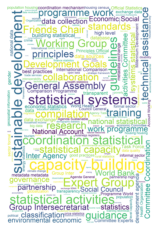

In [13]:
wordcloud = WordCloud(font_path='arial',min_font_size=14,background_color="white",width=2000,height=3000).generate(d)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
wordcloud = WordCloud(font_path='arial',min_font_size=20,max_font_size=60,background_color="white",width=2000,height=100).generate(d)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#this code is to save the image
wordcloud.to_file("wordcloud_StatsCom.png")

In [47]:
#wordcloud.to_file("first_review.png")
?WordCloud

<Figure size 504x504 with 0 Axes>

(-0.5, 378.5, 297.5, -0.5)

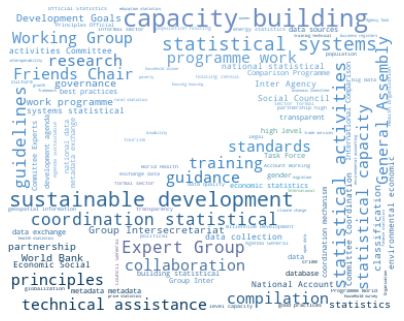

In [47]:
#fail but still fun... this is supposed to be the stats com image hahaha
mask = np.array(Image.open(requests.get('https://unstats.un.org/home/assets/img/home-images/StatComTile.png', stream=True).raw))
wordcloud_spa = WordCloud(background_color="white", max_words=1000, mask=mask).generate(d)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("cloud.png", format="png")
#plt.show()

<Figure size 1440x720 with 0 Axes>

(-0.5, 975.5, 548.5, -0.5)

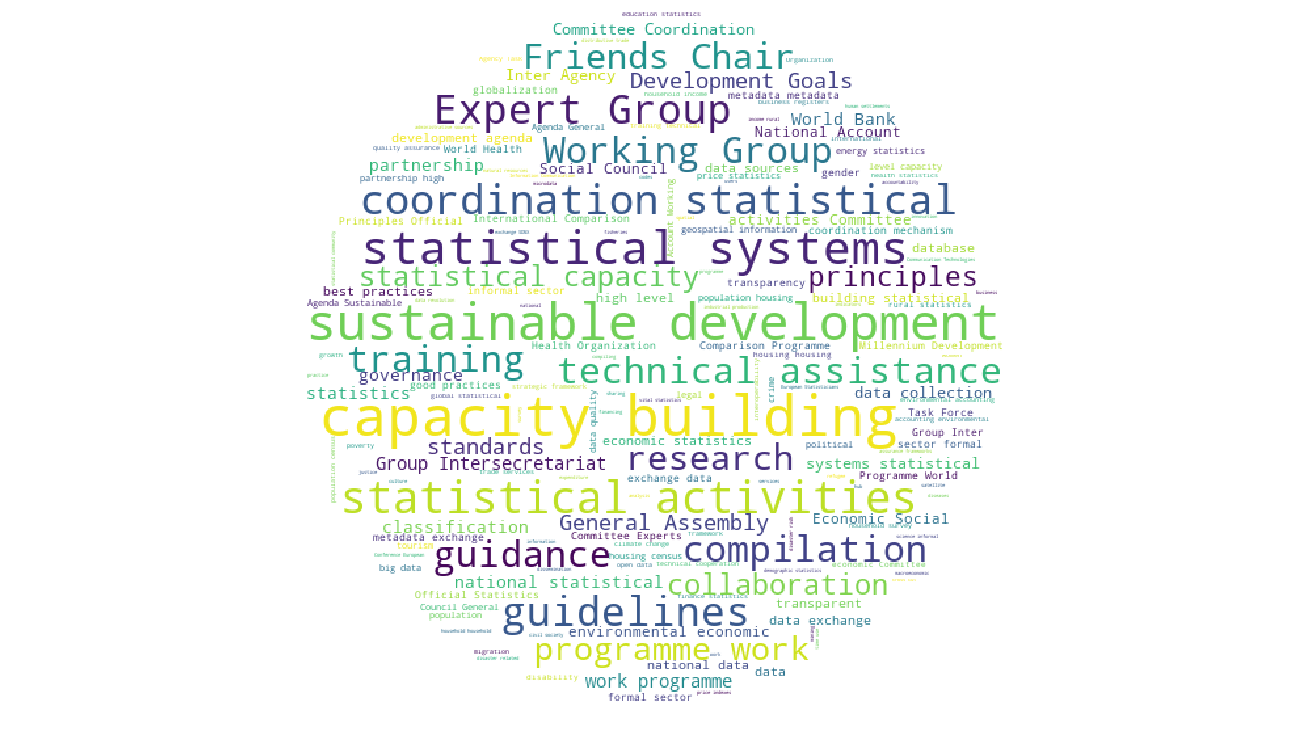

<Figure size 432x288 with 0 Axes>

In [16]:
#oval
#mask = np.array(Image.open(requests.get('https://discourse-cloud-file-uploads.s3.dualstack.us-west-2.amazonaws.com/standard17/uploads/shapr3d/original/2X/e/e2a10657e45156c5c4e641ee424eefe9c54bff3e.png', stream=True).raw))
#circle
#mask = np.array(Image.open(requests.get('https://ichef.bbci.co.uk/news/976/cpsprodpb/16BAA/production/_109089039_primordial-black-holes.png', stream=True).raw))
mask = np.array(Image.open(requests.get('https://ichef.bbci.co.uk/news/976/cpsprodpb/16BAA/production/_109089039_primordial-black-holes.png', stream=True).raw))
wordcloud_spa = WordCloud(background_color="white", max_words=1000, width=2000,height=1000, mask=mask,min_font_size=18).generate(d)


word_cloud = WordCloud(background_color='white', mask=mask).generate(d)
plt.figure(figsize=(20,10),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#save image:
plt.savefig("circle.png", format="png")
#I 